Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


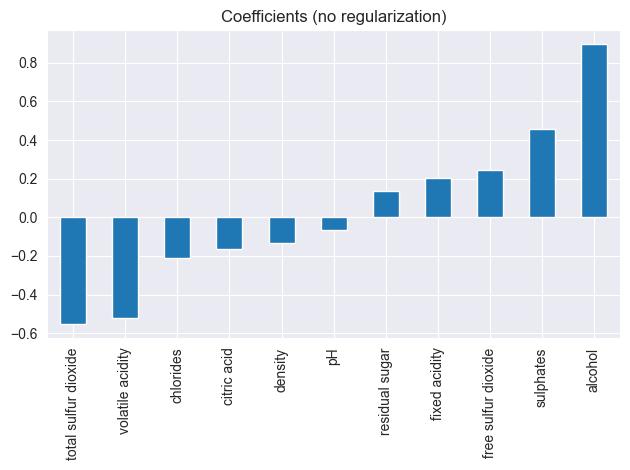

Training Score 0.7727598566308244
Testing Score 0.7266666666666667
Training Score Default 0.7727598566308244
Testing Score Default 0.7266666666666667


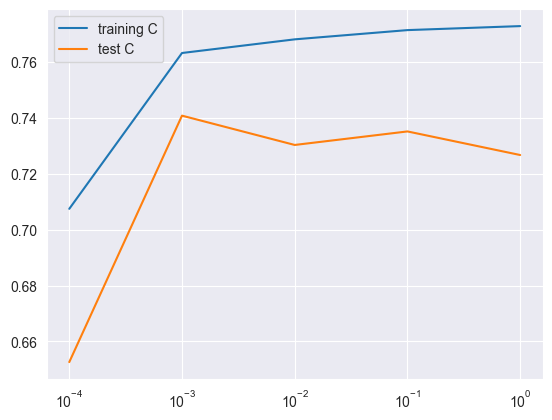

The best c is: 0.0020565123083486517
The best score is:  0.7725370086010586
The f1 score of the best c is:  0.735202492211838
Best C value [0.25950242]
Best fit coefficients [[ 0.1164477  -0.55637429 -0.17265864  0.03124654 -0.17328009  0.20053718
  -0.50584785  0.         -0.07045294  0.43224191  0.94102884]]


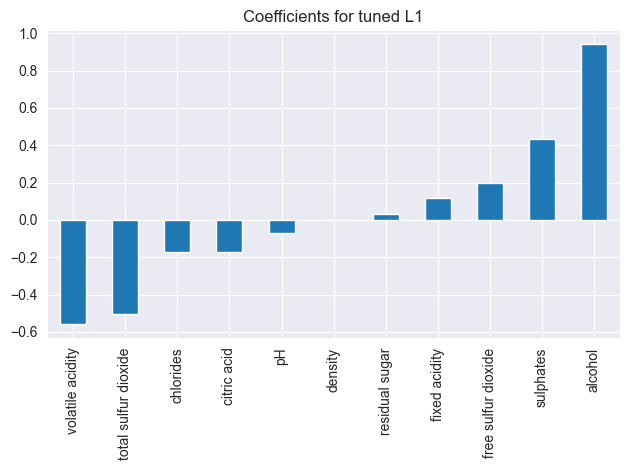

<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_quality.csv')
print(df.columns)
y = df['quality']
features = df.drop(columns = ['quality'])


## 1. Data transformation
from sklearn.preprocessing import StandardScaler
std_fit = StandardScaler().fit(features)
X = std_fit.transform(features)

## 2. Train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=99)

## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression
clf_no_reg = LogisticRegression(penalty = None)
clf_no_reg.fit(x_train,y_train)

## 4. Plot the coefficients
sns.set_style('darkgrid')
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

## 5. Training and test performance
from sklearn.metrics import f1_score
y_pred_test = clf_no_reg.predict(x_test)
y_pred_train = clf_no_reg.predict(x_train)
print('Training Score', f1_score(y_train, y_pred_train))
print('Testing Score', f1_score(y_test, y_pred_test))

## 6. Default Implementation (L2-regularized!)
clf_default = LogisticRegression()
clf_default.fit(x_train,y_train)

## 7. Ridge Scores
y_pred_test = clf_default.predict(x_test)
y_pred_train = clf_default.predict(x_train)
print('Training Score Default', f1_score(y_train, y_pred_train))
print('Testing Score Default', f1_score(y_test, y_pred_test))

## 8. Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]
for items in C_array:
  clf_reg = LogisticRegression(C=items)
  clf_reg.fit(x_train,y_train)
  y_pred_test = clf_reg.predict(x_test)
  test_array.append(f1_score(y_test,y_pred_test))
  y_pred_train = clf_reg.predict(x_train)
  training_array.append(f1_score(y_train,y_pred_train))

## 9. Plot training and test scores as a function of C
plt.plot(C_array,training_array)
plt.plot(C_array,test_array)
plt.legend(['training C', 'test C'])
plt.xscale('log')
plt.show()
plt.clf()

## 10. Making a parameter grid for GridSearchCV
log_array = np.logspace(-4,-2,100)
tuning_c = {'C':log_array}

## 11. Implementing GridSearchCV with l2 penalty
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
gs = GridSearchCV(clf,param_grid = tuning_c, scoring = 'f1', cv=5)
gs.fit(x_train,y_train)
## 12. Optimal C value and the score corresponding to it
best_c = gs.best_params_['C']
print('The best c is:', best_c)
best_score = gs.best_score_
print('The best score is: ', best_score)

## 13. Validating the "best classifier"
clf_best_ridge = LogisticRegression(C=best_c)
clf_best_ridge.fit(x_train,y_train)
y_pred_best = clf_best_ridge.predict(x_test)
print('The f1 score of the best c is: ', f1_score(y_test,y_pred_best))

## 14. Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
C_array = np.logspace(-2,2,100)
clf_l1 = LogisticRegressionCV(Cs = C_array, cv= 5, penalty='l1', solver ='liblinear',scoring='f1')
clf_l1.fit(X,y)

## 15. Optimal C value and corresponding coefficients
print('Best C value', clf_l1.C_)
print('Best fit coefficients', clf_l1.coef_)

## 16. Plotting the tuned L1 coefficients
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.534709  
std       0.154386     0.169507     1.065668     0.498950  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     1.000000  
75%       3.400000     0.730000    11.100000     1.000000  
max       4.010000     2.000000    14.900000     1.000000

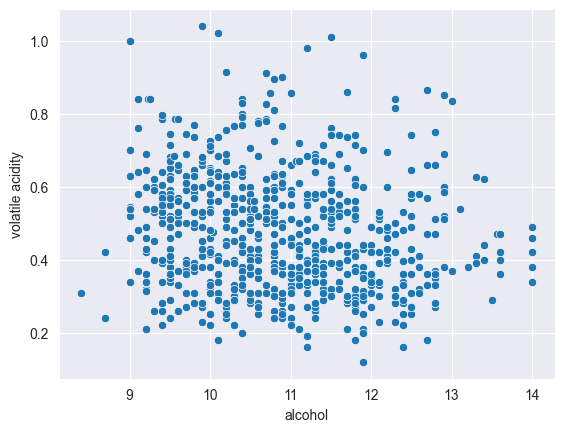

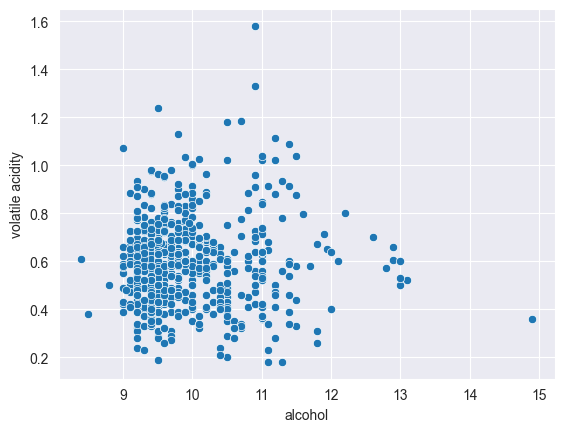

<Figure size 640x480 with 0 Axes>

In [26]:
## Plotting the features
coefficients = clf_l1.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
print(predictors)
display(df.describe())
sns.scatterplot(data=df[df['quality'] == 1], x='alcohol', y='volatile acidity')
plt.show()
plt.clf()
sns.scatterplot(data=df[df['quality'] == 0], x='alcohol', y='volatile acidity')
plt.show()
plt.clf()

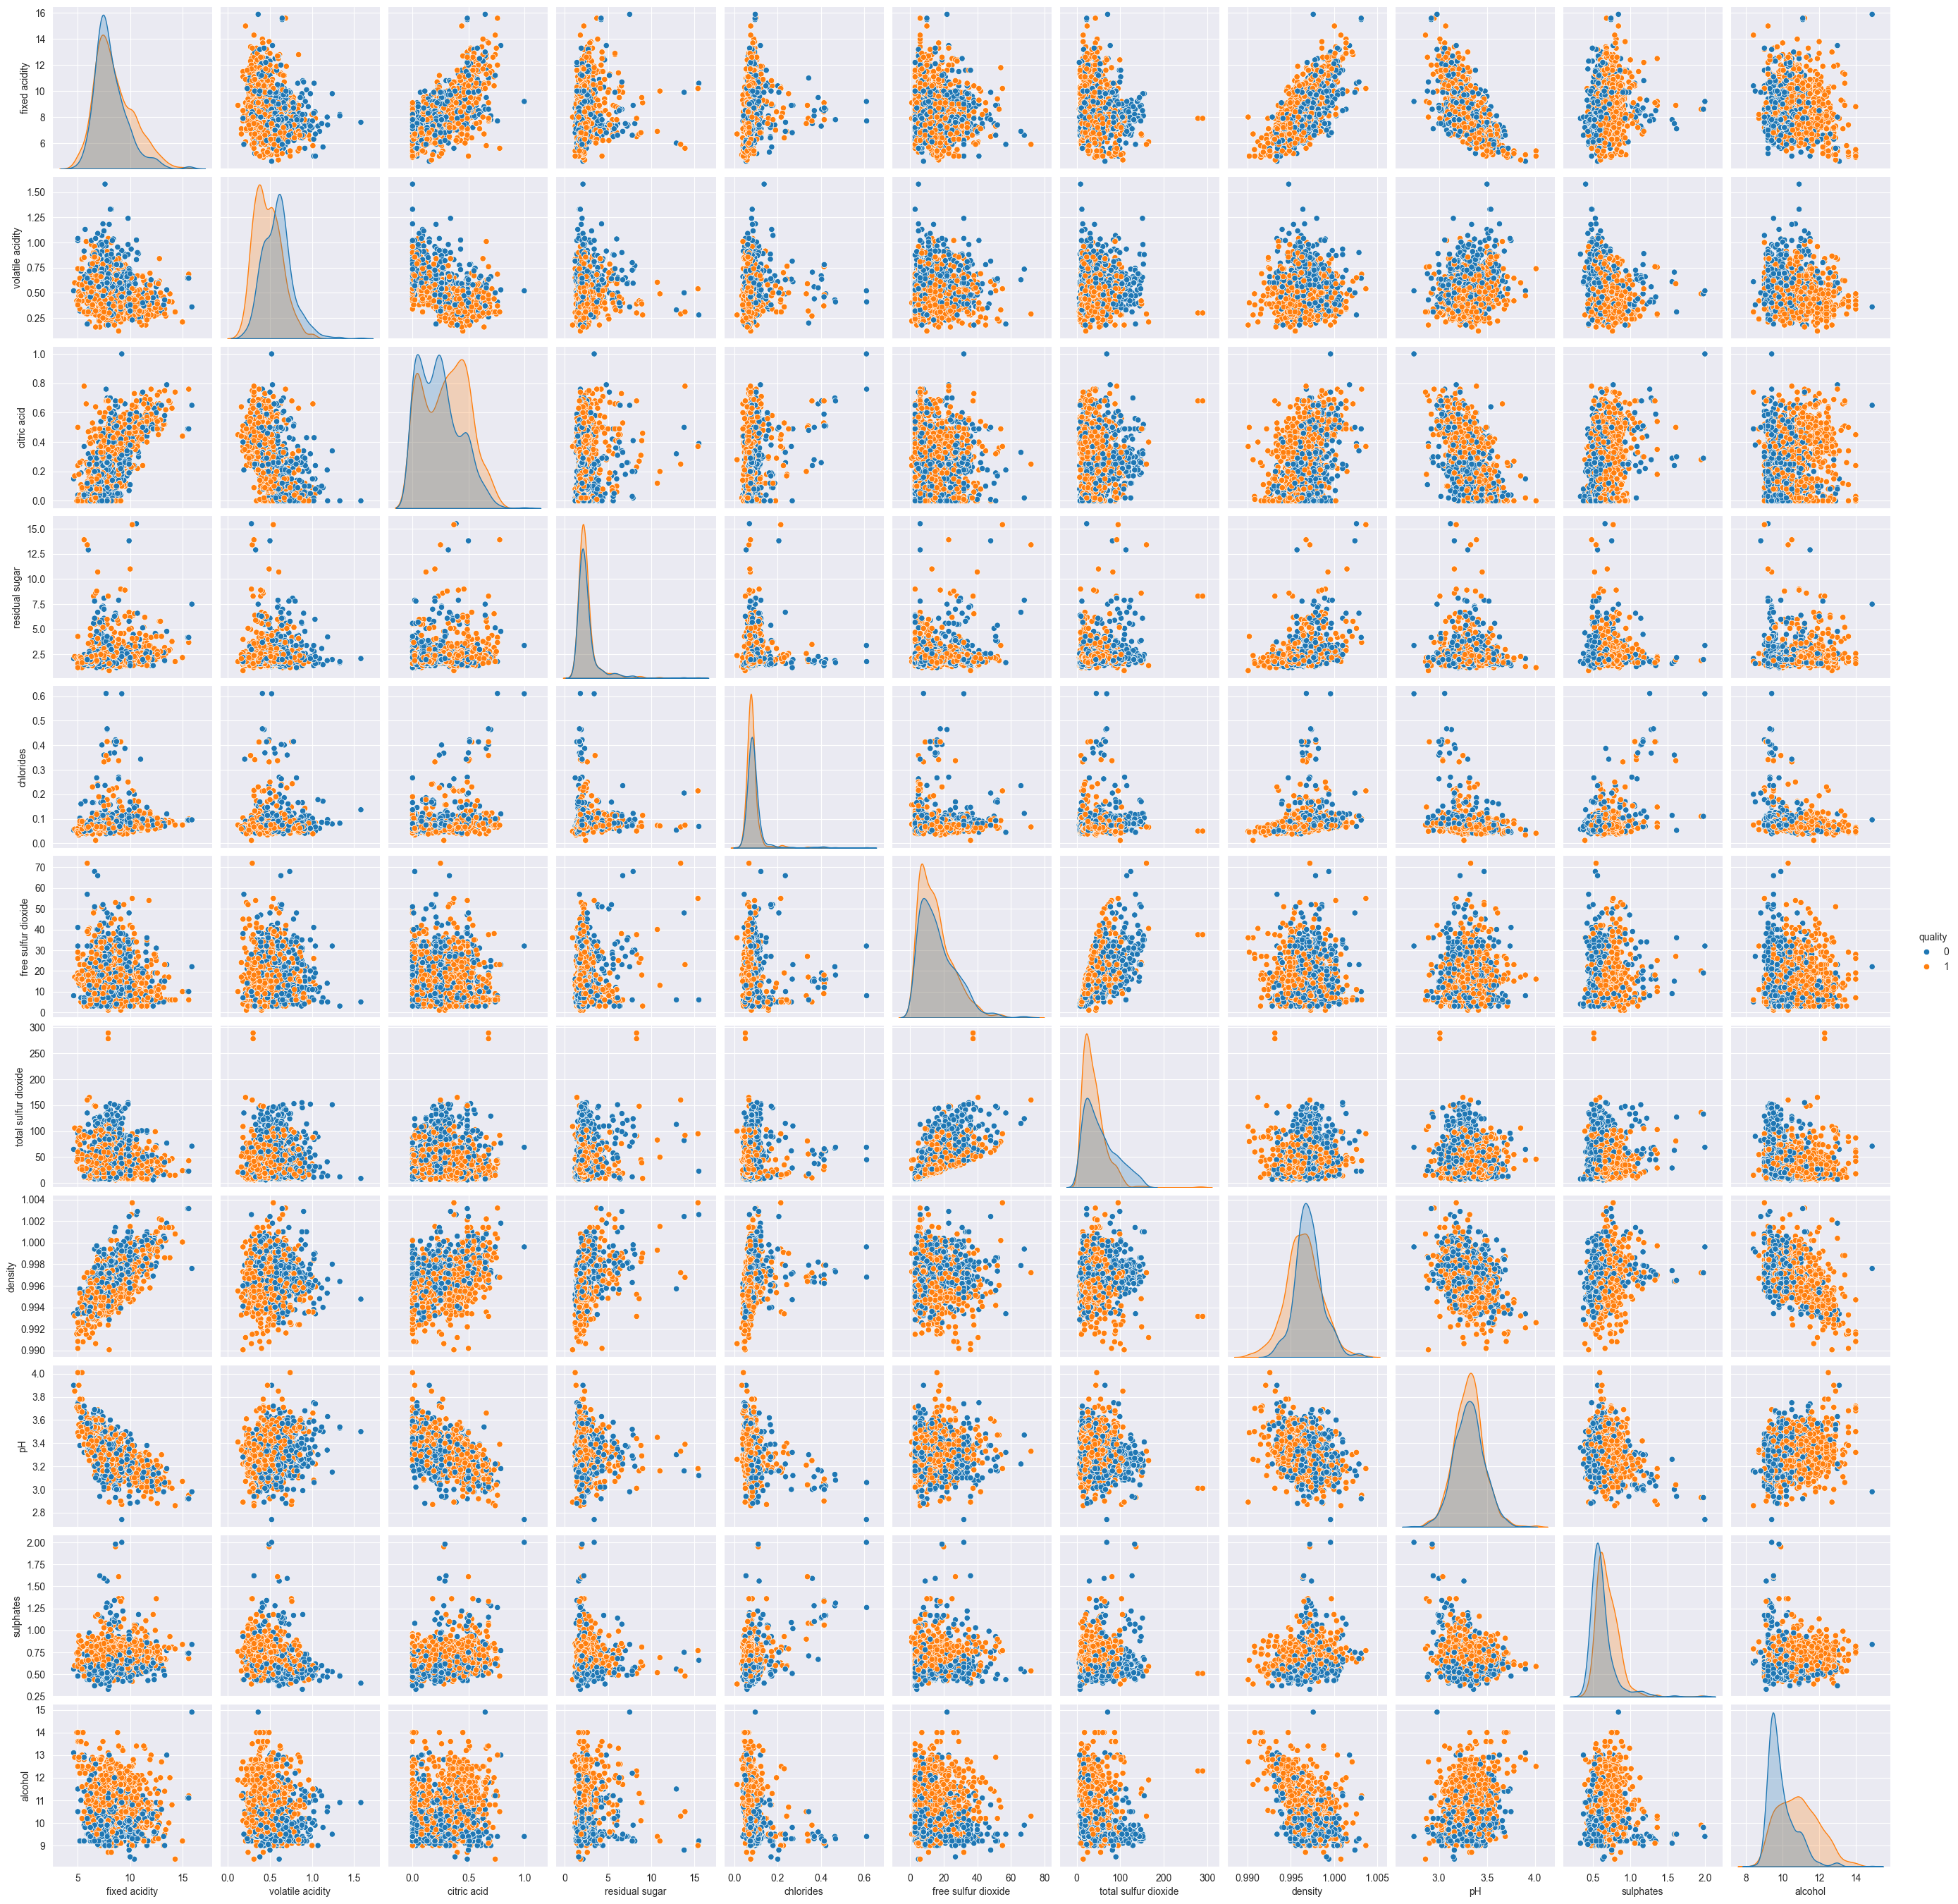

<Figure size 640x480 with 0 Axes>

In [29]:
sns.pairplot(df, hue='quality')
plt.show()
plt.clf()